In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [4]:
def sum_filter_python(phi):
    [Nx,Ny] = phi.shape
    phi = np.round(phi)

    phi_sum = np.zeros([Nx,Ny])
    for i in range(5,Nx-4):
        for k in range(5,Ny-4):
            for j in range(k-4,k+4+1):
                phi_sum[i,k] = phi_sum[i,k] + int(phi[i,k]==phi[i-4,j])*phi[i-4,j] + int(phi[i,k]==phi[i-3,j])*phi[i-3,j] + int(phi[i,k]==phi[i-2,j])*phi[i-2,j] + int(phi[i,k]==phi[i-1,j])*phi[i-1,j] + int(phi[i,k]==phi[i-0,j])*phi[i,j] + int(phi[i,k]==phi[i+1,j])*phi[i+1,j] + int(phi[i,k]==phi[i+2,j])*phi[i+2,j] + int(phi[i,k]==phi[i+3,j])*phi[i+3,j] + int(phi[i,k]==phi[i+4,j])*phi[i+4,j]

    phi_sum = np.divide(phi,phi_sum)
    phi_sum[np.isnan(phi_sum)] = 0
    phi_sum_max = np.amax(np.amax(phi_sum))
    phi_sum = np.divide(phi_sum,phi_sum_max)

    phi_sum_temp = phi_sum
    cutoff = np.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
    phi_sum[phi_sum<cutoff] = 0
    phi_sum[phi_sum!=1] = 0
    return phi_sum

def highlightZone(tip):
    [Max_y,Max_x] = np.where(tip==1)
    size_Max = len(Max_x)
    Nx, Ny = phi_plot.shape
    tips = np.zeros([Nx,Ny])
    temp = np.zeros([Nx,Ny])
    for l in range(0,size_Max):
        max_x = Max_x[l]
        max_y = Max_y[l]
        for i in range(max_y-2,max_y+2):
            for j in range(max_x-2,max_x+2):
                    temp[i,j] = 1
        tips = tips+temp

    tips[np.abs(tips)>0] = 1
    return tips

In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
def sum_filter_python_tf(phi):
    [Nx,Ny] = tf.shape(phi)
    phi = tf.math.round(phi)

    phi_sum = tf.zeros([Nx,Ny])
    for i in range(5,Nx-4):
        for k in range(5,Ny-4):
            for j in range(k-4,k+4+1):
                phi_sum[i,k] = phi_sum[i,k] + int(phi[i,k]==phi[i-4,j])*phi[i-4,j] + int(phi[i,k]==phi[i-3,j])*phi[i-3,j] + int(phi[i,k]==phi[i-2,j])*phi[i-2,j] + int(phi[i,k]==phi[i-1,j])*phi[i-1,j] + int(phi[i,k]==phi[i-0,j])*phi[i,j] + int(phi[i,k]==phi[i+1,j])*phi[i+1,j] + int(phi[i,k]==phi[i+2,j])*phi[i+2,j] + int(phi[i,k]==phi[i+3,j])*phi[i+3,j] + int(phi[i,k]==phi[i+4,j])*phi[i+4,j]

    phi_sum = tf.math.divide(phi,phi_sum)
    phi_sum[tf.math.is_nan(phi_sum)] = 0
    phi_sum_max = tf.reduce_max(tf.reduce_max(phi_sum))
    phi_sum = tf.math.divide(phi_sum,phi_sum_max)

    phi_sum_temp = phi_sum
    cutoff = tfp.stats.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
    phi_sum[phi_sum<cutoff] = 0
    phi_sum[phi_sum!=1] = 0
    return phi_sum

def highlightZone_tf(tip):
    [Max_y,Max_x] = np.where(tip==1)
    size_Max = len(Max_x)
    Nx, Ny = phi_plot.shape
    tips = np.zeros([Nx,Ny])
    temp = np.zeros([Nx,Ny])
    for l in range(0,size_Max):
        max_x = Max_x[l]
        max_y = Max_y[l]
        for i in range(max_y-2,max_y+2):
            for j in range(max_x-2,max_x+2):
                    temp[i,j] = 1
        tips = tips+temp

    tips[np.abs(tips)>0] = 1
    return tips

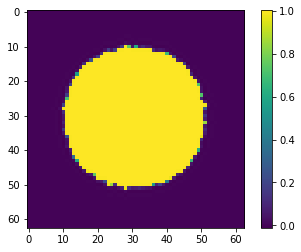

In [6]:
phi_plot = np.array(scipy.io.loadmat('phi_plot.mat')['phi_plot'])
plt.imshow(phi_plot)
plt.colorbar()

/tmp/ipykernel_79647/1105414150.py:11: RuntimeWarning: invalid value encountered in true_divide
  phi_sum = np.divide(phi,phi_sum)


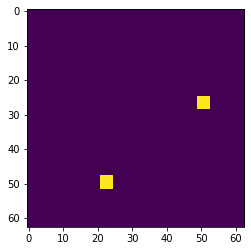

In [7]:
python_tip = sum_filter_python(phi_plot)
tips = highlightZone(python_tip)
plt.imshow(tips)

In [8]:
import tensorflow as tf
import tensorflow_probability as tfp

phi = phi_plot
[Nx,Ny] = tf.shape(phi)
phi = tf.math.round(phi)

phi_sum = tf.Variable(tf.zeros([Nx,Ny],tf.float64))
# ps = np.zeros([Nx,Ny])

for i in range(5,Nx-4):
    for k in range(5,Ny-4):
        for j in range(k-4,k+4+1):
            # ps[i,k] = tf.cast(phi[i,k],tf.float64) + tf.cast(phi[i,k]==phi[i-4,j],tf.float64)*phi[i-4,j] + tf.cast(phi[i,k]==phi[i-3,j],tf.float64)*phi[i-3,j] + tf.cast(phi[i,k]==phi[i-2,j],tf.float64)*phi[i-2,j] + tf.cast(phi[i,k]==phi[i-1,j],tf.float64)*phi[i-1,j] + tf.cast(phi[i,k]==phi[i-0,j],tf.float64)*phi[i,j] + tf.cast(phi[i,k]==phi[i+1,j],tf.float64)*phi[i+1,j] + tf.cast(phi[i,k]==phi[i+2,j],tf.float64)*phi[i+2,j] + tf.cast(phi[i,k]==phi[i+3,j],tf.float64)*phi[i+3,j] + tf.cast(phi[i,k]==phi[i+4,j],tf.float64)*phi[i+4,j]
            phi_sum[i,k].assign(tf.cast(phi[i,k],tf.float64) + tf.cast(phi[i,k]==phi[i-4,j],tf.float64)*phi[i-4,j])
            
# ps = np.divide(phi,phi_sum)
# phi_sum[tf.cast(tf.math.is_nan(phi_sum),tf.int8)] = 0
# phi_sum_max = tf.reduce_max(tf.reduce_max(phi_sum))
# phi_sum = tf.math.divide(phi_sum,phi_sum_max)

# phi_sum_temp = phi_sum
# cutoff = tfp.stats.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
# phi_sum[phi_sum<cutoff] = 0
# phi_sum[phi_sum!=1] = 0

# plt.imshow(phi_sum)

2022-06-23 20:09:19.802048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 20:09:19.828036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 20:09:19.828178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 20:09:19.829238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

/tmp/ipykernel_48978/145551458.py:1: RuntimeWarning: invalid value encountered in true_divide
  phi_sum = np.divide(phi,ps)


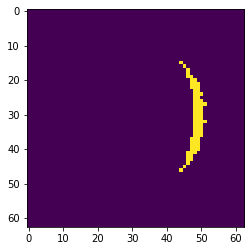

In [45]:
phi_sum = np.divide(phi,ps)
phi_sum[np.isnan(phi_sum)] = 0
phi_sum_max = np.amax(np.amax(phi_sum))
phi_sum = np.divide(phi_sum,phi_sum_max)

phi_sum_temp = phi_sum
cutoff = np.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
phi_sum[phi_sum<cutoff] = 0
phi_sum[phi_sum!=1] = 0
plt.imshow(phi_sum)

In [46]:
[Nx,Ny] = phi.shape
phi = np.round(phi)

phi_sum = np.zeros([Nx,Ny])
for i in range(5,Nx-4):
    for k in range(5,Ny-4):
        for j in range(k-4,k+4+1):
            phi_sum[i,k] = phi_sum[i,k] + int(phi[i,k]==phi[i-4,j])*phi[i-4,j] + int(phi[i,k]==phi[i-3,j])*phi[i-3,j] + int(phi[i,k]==phi[i-2,j])*phi[i-2,j] + int(phi[i,k]==phi[i-1,j])*phi[i-1,j] + int(phi[i,k]==phi[i-0,j])*phi[i,j] + int(phi[i,k]==phi[i+1,j])*phi[i+1,j] + int(phi[i,k]==phi[i+2,j])*phi[i+2,j] + int(phi[i,k]==phi[i+3,j])*phi[i+3,j] + int(phi[i,k]==phi[i+4,j])*phi[i+4,j]

phi_sum = np.divide(phi,phi_sum)
phi_sum[np.isnan(phi_sum)] = 0
phi_sum_max = np.amax(np.amax(phi_sum))
phi_sum = np.divide(phi_sum,phi_sum_max)

phi_sum_temp = phi_sum
cutoff = np.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
phi_sum[phi_sum<cutoff] = 0
phi_sum[phi_sum!=1] = 0

/tmp/ipykernel_48978/1030842525.py:10: RuntimeWarning: invalid value encountered in true_divide
  phi_sum = np.divide(phi,phi_sum)


In [34]:
phi_sum[tf.cast(tf.math.is_nan(phi_sum),tf.int8)] = 0

TypeError: only integer scalar arrays can be converted to a scalar index

In [35]:
tf.math.is_nan(phi_sum)

<tf.Tensor: shape=(63, 63), dtype=bool, numpy=
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])>

In [36]:
tf.cast(tf.math.is_nan(phi_sum),tf.int8)

<tf.Tensor: shape=(63, 63), dtype=int8, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)>

In [19]:
i = 10
j = 30
tf.cast(phi[i,k]==phi[i-4,j],tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

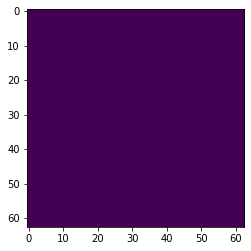

In [21]:
ps = np.zeros([Nx,Ny])
ps[i,k] = tf.cast(phi_sum[i,k],tf.float64) + tf.cast(phi[i,k]==phi[i-4,j],tf.float64)*phi[i-4,j]
plt.imshow(ps)

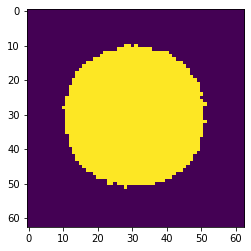

In [24]:
phi = phi_plot
[Nx,Ny] = tf.shape(phi)
phi = tf.math.round(phi)
plt.imshow(phi)

In [25]:
phi

<tf.Tensor: shape=(63, 63), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>